In [35]:
%load_ext itikz

In [3]:
import itikz
import jinja2

## Invoke itikz without using cell magic

# itikz.build_commands?
# itikz.fetch_or_compile_svg?

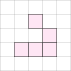

In [4]:
%%itikz --temp-dir --file-prefix implicit-demo- --template pic --use-xetex --scale 0.5
\draw[help lines] grid (5, 5);
\draw[fill=magenta!10] (1, 1) rectangle (2, 2);
\draw[fill=magenta!10] (2, 1) rectangle (3, 2);
\draw[fill=magenta!10] (3, 1) rectangle (4, 2);
\draw[fill=magenta!10] (3, 2) rectangle (4, 3);
\draw[fill=magenta!10] (2, 3) rectangle (3, 4);

In [5]:
%%itikz --temp-dir --template standalone --tex-packages=smartdiagram,amsfonts
\smartdiagramset{uniform sequence color=true,
sequence item border color=black,
sequence item font size=\footnotesize,
sequence item text color=white
}
\smartdiagram[sequence diagram]{
    $\mathbb{N}$,
    $\mathbb{Z}$,
    $\mathbb{Q}$,
    $\mathbb{R}$,
    $\mathbb{I}$,
    $\mathbb{C}$
}

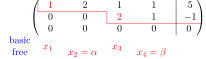

In [30]:
%%itikz --temp-dir --template standalone --tex-packages=nicematrix,tikz,relsize,amsmath --tikz-libraries=decorations.pathreplacing
% --nexec=4  --use-dvi --use-xetex 
\NiceMatrixOptions{code-for-last-row = \color{red}, code-for-first-row = \color{red}}
$\begin{pNiceArray}{cccc|c}[left-margin = 4pt, first-col, last-row,
    code-before =
    {
    \tikz \draw[red] (row-1-|col-1) -- (row-2-|col-1) -- (row-2-|col-3) -- (row-3-|col-3) -- (row-3-|col-6);
    }
]
& \color{red}{1}   & 2 & 1                  & 1 & \;  5 \\
                               & 0                    & 0 & \color{red}{2} & 1 & \; -1 \\
                               & 0                    & 0 & 0                  & 0 &     0 \\
%
      \color{blue}{\begin{matrix} \text{basic} \\ \text{free} \end{matrix}}
    & \begin{matrix} x_1        \\             \end{matrix}
    & \begin{matrix}            \\  x_2=\alpha \end{matrix}
    & \begin{matrix} x_3        \\             \end{matrix}
    & \begin{matrix}            \\  x_4=\beta  \end{matrix}
    &
\end{pNiceArray}$

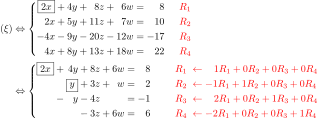

In [36]:
%%itikz --temp-dir  --file-prefix foo_  --template article --crop --tex-packages=systeme,amsmath,xcolor
%--use-dvi --use-xetex
% -----------------------------------------------------
\begin{flalign*}
(\xi)
& \Leftrightarrow \sysalign{r,r}\systeme[xyzw]{
      \boxed{2 x}  + 4 y  + 8 z   + 6 w   = 8     @\color{red}{R_1},
      2  x          + 5 y  + 11 z  + 7 w   = 10   @\color{red}{R_2},
      -4 x          -9  y  -20  z  -12 w   = -17  @\color{red}{R_3},
      4  x          + 8 y  + 13 z  + 18 w  = 22   @\color{red}{R_4}
      } \\
%
\sysautonum{\quad \color{red}{R_{*}\; \leftarrow \;}}
& \Leftrightarrow \sysautonum{\quad \color{red}{R_{*}\; \leftarrow \;}}
\sysalign{r,r}\systeme[xyzw]{
      \boxed{2 x}  + 4 y  + 8 z  + 6 w   = 8  @\color{red}{\ \;\;1 R_1 + 0 R_2 + 0 R_3 + 0 R_4},
                \boxed{y} + 3 z  +   w   = 2  @\color{red}{   -1 R_1 + 1 R_2 + 0 R_3 + 0 R_4},
                    -  y  - 4 z         = -1  @\color{red}{\ \;\;2 R_1 + 0 R_2 + 1 R_3 + 0 R_4},
                          - 3 z  + 6 w  =  6  @\color{red}{   -2 R_1 + 0 R_2 + 0 R_3 + 1 R_4}
      }
\end{flalign*}